In [113]:

# %pip install openpyxl
# %pip install pandas
import pandas as pd 
df = pd.read_excel("Retail Sales Case Study.xlsx")
df.head()

,Timeframe,sales (Million $),Digital (Million $),radio (Million $),TV (Thousands $)
0,2020-01-01,397.8,115.05,18.90,34.60
1,2020-02-01,187.2,22.25,19.65,22.55
2,2020-03-01,167.4,8.60,22.95,34.65
3,2020-04-01,333.0,75.75,20.65,29.25
4,2020-05-01,232.2,90.40,5.40,29.20


In [114]:
df = pd.DataFrame(df)

df["Timeframe"] = pd.to_datetime(df["Timeframe"])
df["Quarter"] = df["Timeframe"].dt.to_period("Q")

df.head(10)

,Timeframe,sales (Million $),Digital (Million $),radio (Million $),TV (Thousands $),Quarter
0,2020-01-01,397.8,115.05,18.90,34.60,2020Q1
1,2020-02-01,187.2,22.25,19.65,22.55,2020Q1
2,2020-03-01,167.4,8.60,22.95,34.65,2020Q1
3,2020-04-01,333.0,75.75,20.65,29.25,2020Q2
4,2020-05-01,232.2,90.40,5.40,29.20,2020Q2
5,2020-06-01,129.6,4.35,24.45,37.50,2020Q2
6,2020-07-01,212.4,28.75,16.40,11.75,2020Q3
7,2020-08-01,237.6,60.10,9.80,5.80,2020Q3
8,2020-09-01,86.4,4.30,1.05,0.50,2020Q3
9,2020-10-01,190.8,99.90,1.30,10.60,2020Q4


In [115]:
df["Timeframe"] = pd.to_datetime(df["Timeframe"])
df["year"] = df["Timeframe"].dt.year
year2020 = df[df["year"] == 2020]


In [116]:
df['TV (Millions $)'] = [value / 1000 for value in df['TV (Thousands $)']]
df
newdf = df[['Quarter', 'year', 'Timeframe', 'sales (Million $)', 'Digital (Million $)', 'radio (Million $)', 'TV (Millions $)']]
newdf.head(5)

,Quarter,year,Timeframe,sales (Million $),Digital (Million $),radio (Million $),TV (Millions $)
0,2020Q1,2020,2020-01-01,397.8,115.05,18.90,0.03460
1,2020Q1,2020,2020-02-01,187.2,22.25,19.65,0.02255
2,2020Q1,2020,2020-03-01,167.4,8.60,22.95,0.03465
3,2020Q2,2020,2020-04-01,333.0,75.75,20.65,0.02925
4,2020Q2,2020,2020-05-01,232.2,90.40,5.40,0.02920


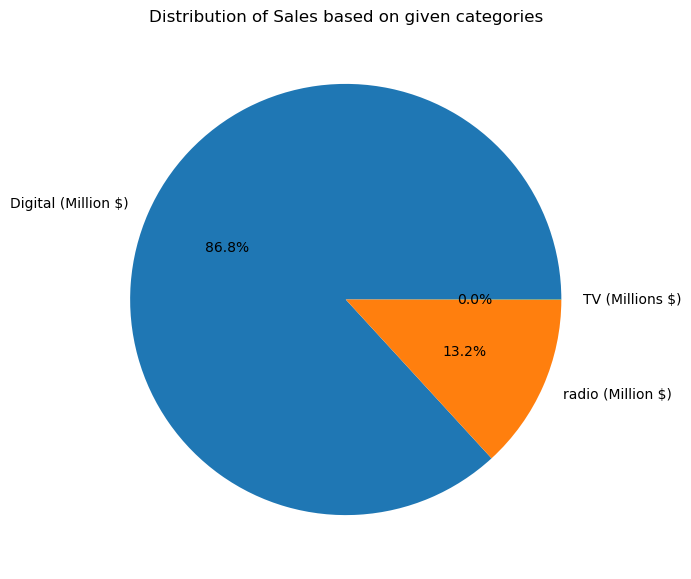

In [117]:
# %pip install matplotlib

import matplotlib.pyplot as plt

data = newdf[['Digital (Million $)', 'radio (Million $)', 'TV (Millions $)']].sum()
categories = ['Digital (Million $)', 'radio (Million $)', 'TV (Millions $)']
total_sales = newdf['sales (Million $)'].sum()

fig = plt.figure(figsize=(10,7))
plt.pie(data, labels=categories, autopct='%1.1f%%')
plt.title('Distribution of Sales based on given categories')
plt.show()

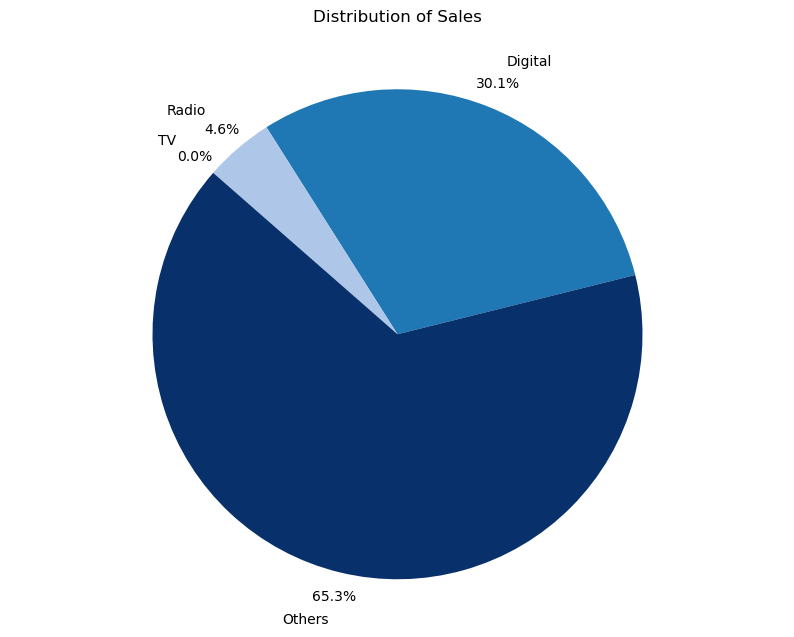

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = newdf[['Digital (Million $)', 'radio (Million $)', 'TV (Millions $)']].sum()
categories = ['Digital', 'Radio', 'TV']

total_sales = newdf['sales (Million $)'].sum()
others = total_sales - data.sum()

data = pd.concat([data, pd.Series([others], index=['Others'])])
categories.append('Others')

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=categories,labeldistance=1.2, textprops={'color': 'black'}, autopct='%1.1f%%', startangle=14, pctdistance=1.1, colors=['#1f77b4', '#aec7e8', '#c6dbef', '#08306b'])

plt.title('Distribution of Sales\n\n')
plt.axis('equal')  


plt.show()


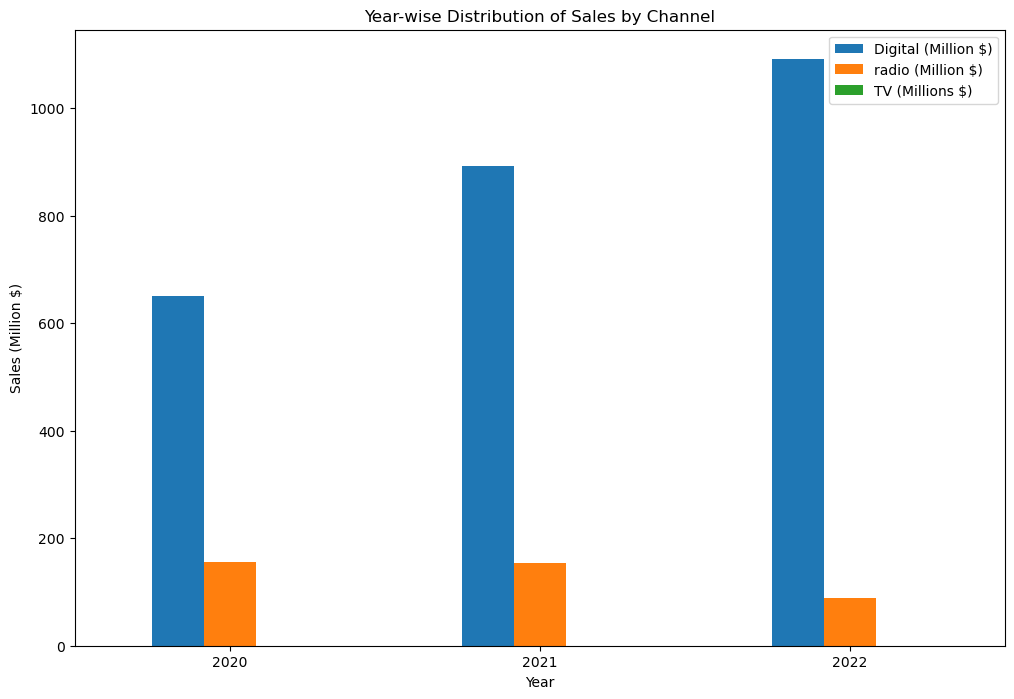

In [119]:
yearly_data = newdf.groupby('year')[['Digital (Million $)', 'radio (Million $)', 'TV (Millions $)']].sum()

fig, ax = plt.subplots(figsize=(12, 8))
yearly_data.plot(kind='bar', ax=ax)
ax.set_title('Year-wise Distribution of Sales by Channel')
ax.set_xlabel('Year')
ax.set_ylabel('Sales (Million $)')
plt.xticks(rotation=0)

plt.show()

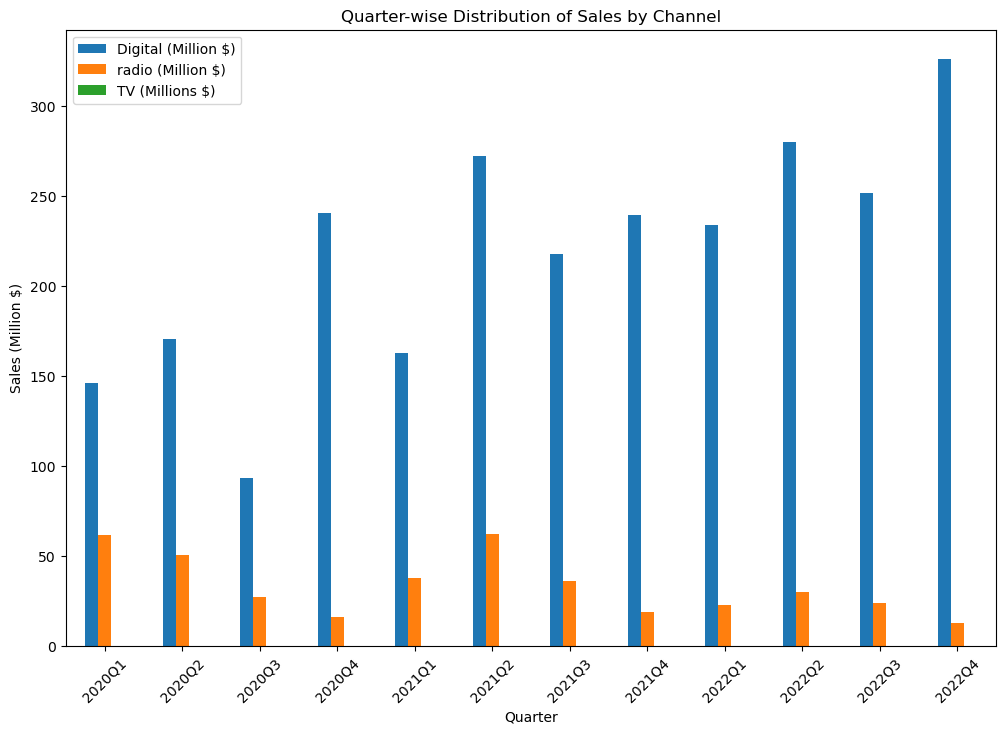

In [120]:
quarterly_data = newdf.groupby('Quarter')[['Digital (Million $)', 'radio (Million $)', 'TV (Millions $)']].sum()
quarterly_sales = newdf.groupby('Quarter')[['sales (Million $)']].sum()

fig, ax = plt.subplots(figsize=(12, 8))
quarterly_data.plot(kind='bar', ax=ax)
ax.set_title('Quarter-wise Distribution of Sales by Channel')
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales (Million $)')
plt.xticks(rotation=45)

plt.show()


In [121]:
newdf

,Quarter,year,Timeframe,sales (Million $),Digital (Million $),radio (Million $),TV (Millions $)
0,2020Q1,2020,2020-01-01,397.8,115.05,18.90,0.03460
1,2020Q1,2020,2020-02-01,187.2,22.25,19.65,0.02255
2,2020Q1,2020,2020-03-01,167.4,8.60,22.95,0.03465
3,2020Q2,2020,2020-04-01,333.0,75.75,20.65,0.02925
4,2020Q2,2020,2020-05-01,232.2,90.40,5.40,0.02920
5,2020Q2,2020,2020-06-01,129.6,4.35,24.45,0.03750
6,2020Q3,2020,2020-07-01,212.4,28.75,16.40,0.01175
7,2020Q3,2020,2020-08-01,237.6,60.10,9.80,0.00580
8,2020Q3,2020,2020-09-01,86.4,4.30,1.05,0.00050
9,2020Q4,2020,2020-10-01,190.8,99.90,1.30,0.01060


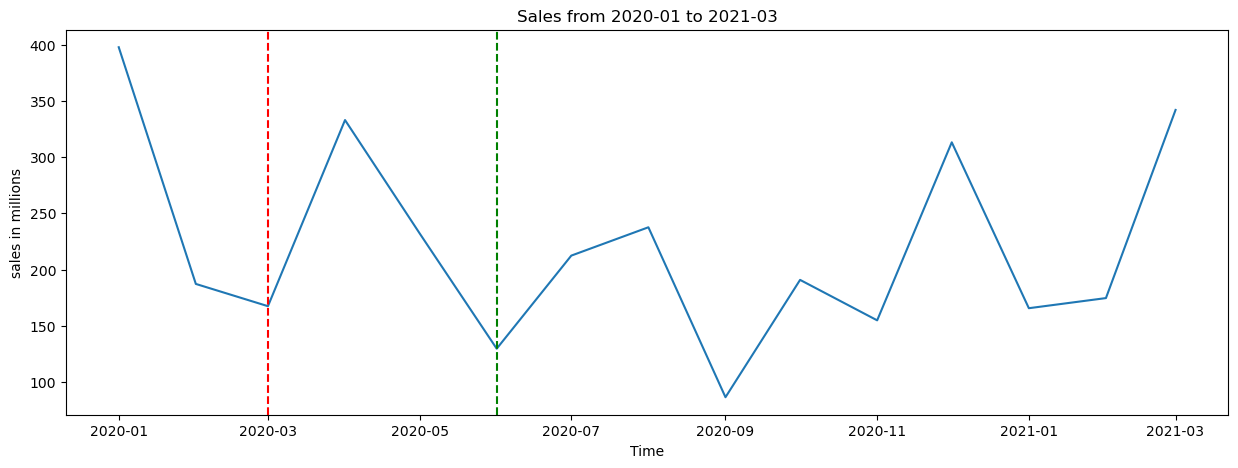

In [122]:
a= newdf.iloc[:15,2:4]
# print(a)
plt.figure(figsize=(15,5))
plt.plot(a['Timeframe'],a['sales (Million $)'])
plt.axvline(x=pd.to_datetime('2020-03-01'), color='r', linestyle='--', label='COVID Lockdown Start')
plt.axvline(x=pd.to_datetime('2020-06-01'), color='g', linestyle='--', label='COVID Lockdown Relaxed')
plt.xlabel('Time')
plt.ylabel('sales in millions') 
plt.title("Sales from 2020-01 to 2021-03")
plt.show()



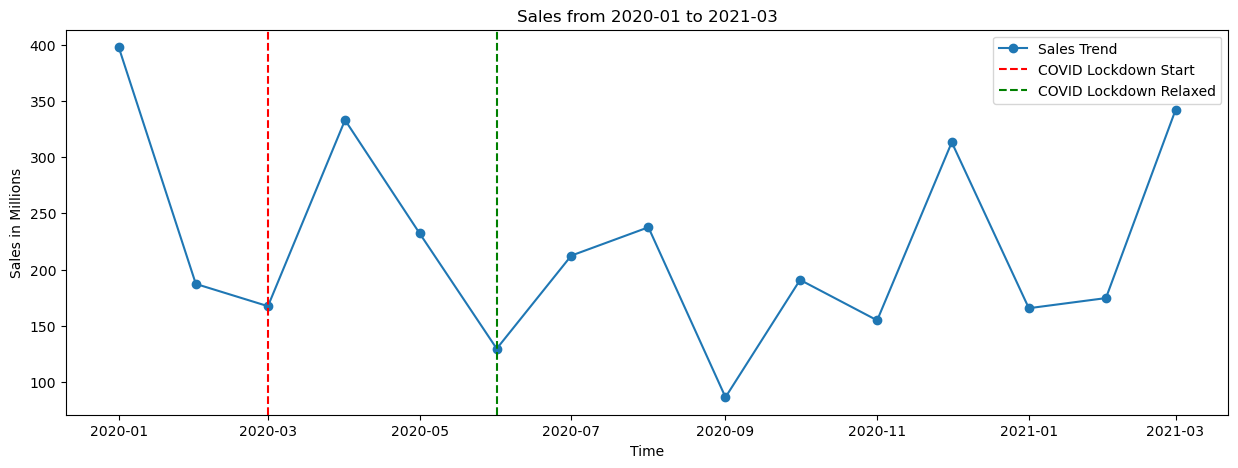

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15, 5))
plt.plot(a['Timeframe'], a['sales (Million $)'], marker='o', label='Sales Trend')
plt.axvline(x=pd.to_datetime('2020-03-01'), color='r', linestyle='--', label='COVID Lockdown Start')
plt.axvline(x=pd.to_datetime('2020-06-01'), color='g', linestyle='--', label='COVID Lockdown Relaxed')

plt.xlabel('Time')
plt.ylabel('Sales in Millions')
plt.title('Sales from 2020-01 to 2021-03')
plt.legend()
plt.show()


In [124]:
quarterly_data

,Digital (Million $),radio (Million $),TV (Millions $)
Quarter,,,
2020Q1,145.90,61.50,0.09180
2020Q2,170.50,50.50,0.09595
2020Q3,93.15,27.25,0.01805
2020Q4,240.30,16.20,0.02470
2021Q1,162.70,37.80,0.05955
2021Q2,272.30,61.95,0.11135
2021Q3,217.45,36.05,0.04540
2021Q4,239.45,18.95,0.04965
2022Q1,234.05,22.70,0.02520


In [125]:

gdp_data = ['GDP % Change',
'-4.60%',
'-29.90%',
'35.30%',
'3.90%',
'6.30%',
'7.00%',
'2.70%',
'7%',
'-1.60%',
'-0.60%',
'3.20%',
'2.60%'
]
inflation = ['inflation % change',
'1.4%',
'0.6%',
'1.0%',
'1.4%',
'1.4%',
'5.0%',
'5.4%',
'6.8%',
'7.5%',
'8.6%',
'9.1%',
'6.5%']

In [126]:

pivot_df = pd.DataFrame({
    'Quarter': quarterly_data.index,
    'GDP % Change': gdp_data[1:],
    'Inflation % Change': inflation[1:]
})

pivot_df['GDP % Change'] = pivot_df['GDP % Change'].str.rstrip('%').astype('float') 
pivot_df['Inflation % Change'] = pivot_df['Inflation % Change'].str.rstrip('%').astype('float')
pv = quarterly_sales.merge(pivot_df, on='Quarter')
pv
report1 = pv.to_excel("report1.xlsx",index=False)
pv

,Quarter,sales (Million $),GDP % Change,Inflation % Change
0,2020Q1,752.4,-4.6,1.4
1,2020Q2,694.8,-29.9,0.6
2,2020Q3,536.4,35.3,1.0
3,2020Q4,658.8,3.9,1.4
4,2021Q1,682.2,6.3,1.4
5,2021Q2,1067.4,7.0,5.0
6,2021Q3,790.2,2.7,5.4
7,2021Q4,604.8,7.0,6.8
8,2022Q1,660.6,-1.6,7.5
9,2022Q2,815.4,-0.6,8.6


In [127]:
review = pv[['Quarter', 'sales (Million $)']]
review.head()
review['sales_diff'] = review['sales (Million $)'].diff() 
review.iloc[:4]
review['percentage_diff'] = review['sales_diff'] / review['sales (Million $)'].shift(1) * 100
review.iloc[:4]

C:\Users\uxth\AppData\Local\Temp\ipykernel_7900\2854156105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['sales_diff'] = review['sales (Million $)'].diff()


,Quarter,sales (Million $),sales_diff,percentage_diff
0,2020Q1,752.4,NaN,NaN
1,2020Q2,694.8,-57.6,-7.655502
2,2020Q3,536.4,-158.4,-22.797927
3,2020Q4,658.8,122.4,22.818792


In [128]:
# %pip install xgboost
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor


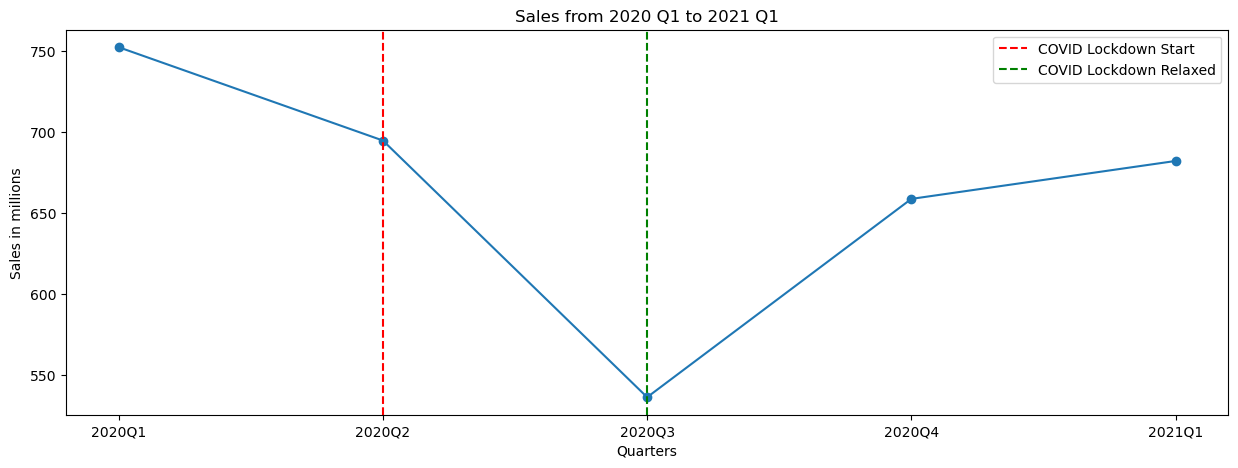

In [129]:
import matplotlib.pyplot as plt

filtered_pv = pv[(pv['Quarter'] >= '2020Q1') & (pv['Quarter'] <= '2021Q1')]

plt.figure(figsize=(15, 5))
plt.plot(filtered_pv['Quarter'].astype(str), filtered_pv['sales (Million $)'], marker='o')
plt.axvline(x='2020Q2', color='r', linestyle='--', label='COVID Lockdown Start')
plt.axvline(x='2020Q3', color='g', linestyle='--', label='COVID Lockdown Relaxed')
plt.xlabel('Quarters')
plt.ylabel('Sales in millions')
plt.title('Sales from 2020 Q1 to 2021 Q1')
plt.legend()
plt.show()

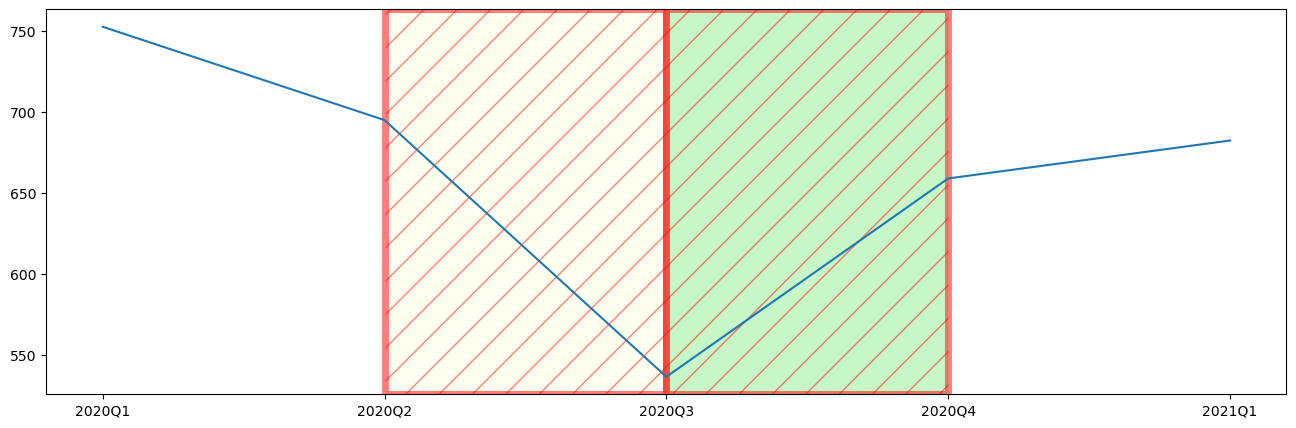

In [130]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(16, 5))
plt.plot(filtered_pv['Quarter'].astype(str), filtered_pv['sales (Million $)'])

plt.axvspan('2020Q2', '2020Q3', facecolor='lightyellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5 ,label='COVID Lockdown Start')
plt.axvspan('2020Q3', '2020Q4', facecolor='lightgreen', alpha=0.5, hatch='/', edgecolor='red', linewidth=5,label='COVID Lockdown Relaxed')
plt.show()

In [131]:
pv['sales_diff'] = pv['sales (Million $)'].diff()
# pv = pv.dropna()
pv

,Quarter,sales (Million $),GDP % Change,Inflation % Change,sales_diff
0,2020Q1,752.4,-4.6,1.4,NaN
1,2020Q2,694.8,-29.9,0.6,-57.6
2,2020Q3,536.4,35.3,1.0,-158.4
3,2020Q4,658.8,3.9,1.4,122.4
4,2021Q1,682.2,6.3,1.4,23.4
5,2021Q2,1067.4,7.0,5.0,385.2
6,2021Q3,790.2,2.7,5.4,-277.2
7,2021Q4,604.8,7.0,6.8,-185.4
8,2022Q1,660.6,-1.6,7.5,55.8
9,2022Q2,815.4,-0.6,8.6,154.8


In [132]:
x = pv.iloc[:,2].values
x

array([ -4.6, -29.9,  35.3,   3.9,   6.3,   7. ,   2.7,   7. ,  -1.6,
        -0.6,   3.2,   2.6])

In [133]:

y = pv.iloc[:,1:2].values
y

array([[ 752.4],
       [ 694.8],
       [ 536.4],
       [ 658.8],
       [ 682.2],
       [1067.4],
       [ 790.2],
       [ 604.8],
       [ 660.6],
       [ 815.4],
       [ 772.2],
       [ 714.6]])

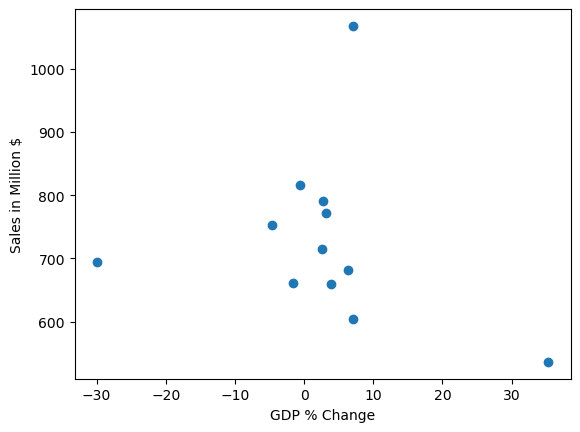

In [134]:
plt.scatter(x,y)
plt.xlabel('GDP % Change')
plt.ylabel('Sales in Million $')
plt.show()


In [135]:
newdf['sales_diff'] = newdf['sales (Million $)'].diff()
# pv = pv.dropna()
newdf

,Quarter,year,Timeframe,sales (Million $),Digital (Million $),radio (Million $),TV (Millions $),sales_diff
0,2020Q1,2020,2020-01-01,397.8,115.05,18.90,0.03460,NaN
1,2020Q1,2020,2020-02-01,187.2,22.25,19.65,0.02255,-210.6
2,2020Q1,2020,2020-03-01,167.4,8.60,22.95,0.03465,-19.8
3,2020Q2,2020,2020-04-01,333.0,75.75,20.65,0.02925,165.6
4,2020Q2,2020,2020-05-01,232.2,90.40,5.40,0.02920,-100.8
5,2020Q2,2020,2020-06-01,129.6,4.35,24.45,0.03750,-102.6
6,2020Q3,2020,2020-07-01,212.4,28.75,16.40,0.01175,82.8
7,2020Q3,2020,2020-08-01,237.6,60.10,9.80,0.00580,25.2
8,2020Q3,2020,2020-09-01,86.4,4.30,1.05,0.00050,-151.2
9,2020Q4,2020,2020-10-01,190.8,99.90,1.30,0.01060,104.4


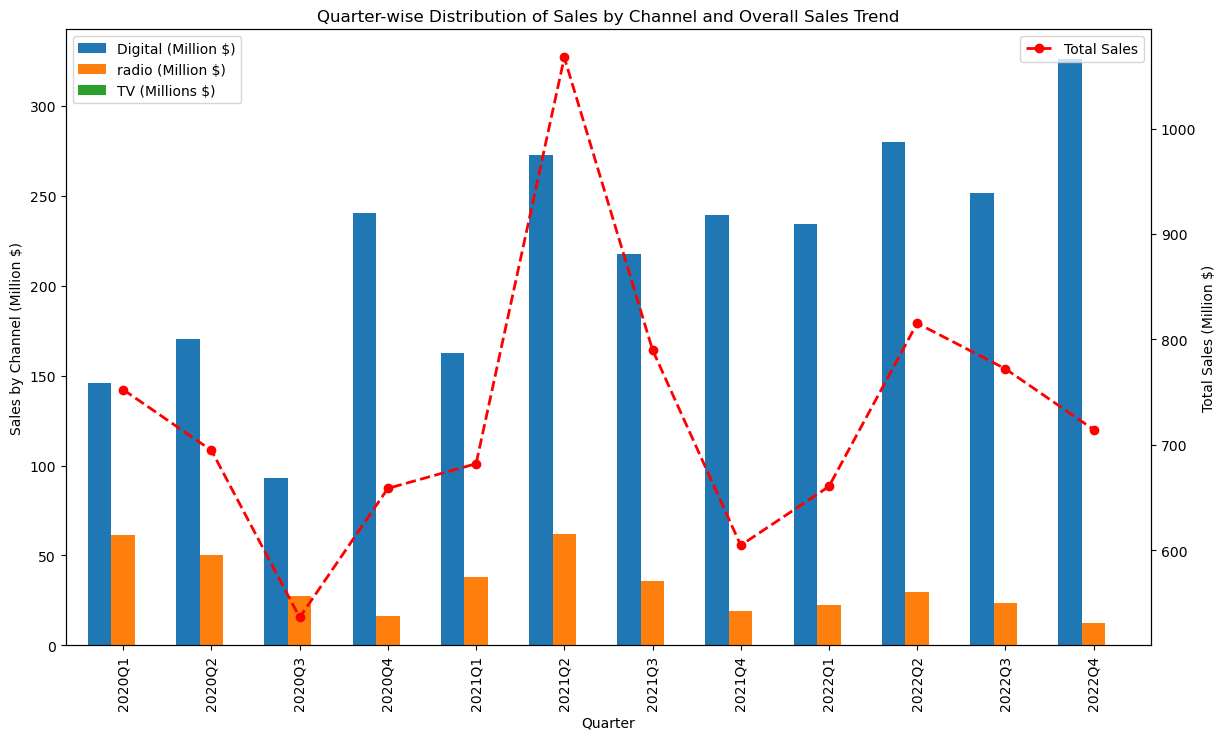

In [136]:
fig, ax1 = plt.subplots(figsize=(14, 8))


quarterly_data.plot(kind='bar', ax=ax1, width=0.8, position=0.5)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Sales by Channel (Million $)')
ax1.set_title('Quarter-wise Distribution of Sales by Channel and Overall Sales Trend')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.plot(quarterly_sales.index.astype(str), quarterly_sales['sales (Million $)'], color='r', marker='o', linestyle='--', linewidth=2, label='Total Sales')
ax2.set_ylabel('Total Sales (Million $)')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()

In [137]:
# plt.figure(figsize=(15,5))
# plt.plot(newdf['Timeframe'], newdf['sales (Million $)'])
# plt.xlabel('Timeframe')
# plt.ylabel('sales in millions') 
# plt.show()

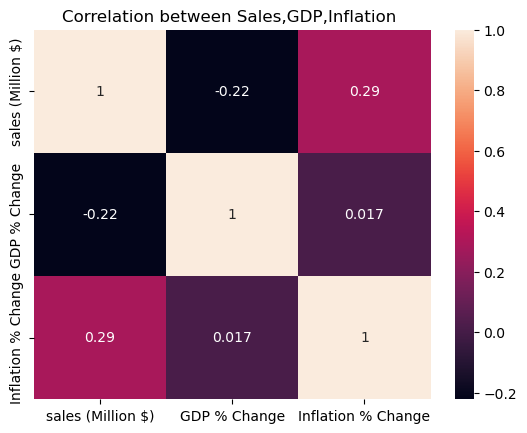

In [138]:
# %pip install scipy
# %pip install seaborn
# %pip install scikit-learn

import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(pv)

correlation_matrix = df[["sales (Million $)", "GDP % Change", "Inflation % Change"]].corr()
correlation_matrix

sns.heatmap(data=correlation_matrix,annot=True)
plt.title("Correlation between Sales,GDP,Inflation ")
plt.show()



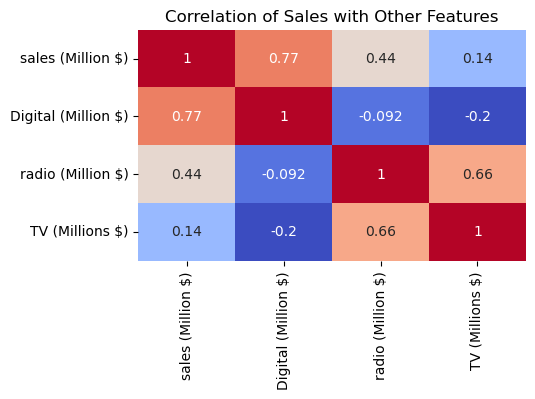

In [139]:
a  = newdf[["sales (Million $)","Digital (Million $)","radio (Million $)","TV (Millions $)"]]
revenue_corr = a.corr()
revenue_corr

plt.figure(figsize=(5, 3))
sns.heatmap(revenue_corr, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Sales with Other Features")
plt.show()

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_corr = a.corr()["sales (Million $)"].drop("sales (Million $)")
sales_corr



Digital (Million $)    0.773515
radio (Million $)      0.444929
TV (Millions $)        0.139157
Name: sales (Million $), dtype: float64

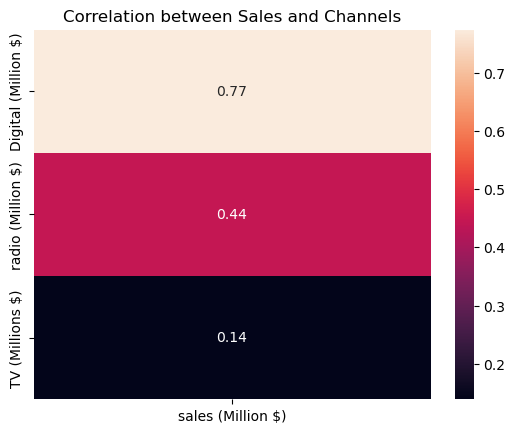

In [141]:
sales_corr_df = sales_corr.to_frame()
hm = sns.heatmap(data=sales_corr_df,annot=True)
hm.set_title("Correlation between Sales and Channels")
plt.show()

In [142]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.DataFrame(pv)
X = df[['GDP % Change', 'Inflation % Change']]
y = df['sales (Million $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [143]:


rf = RandomForestRegressor(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)


# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
print("Random Forest Regressor")
print(f"actual values {list(y_test)}")
print(f"predicted values {y_pred}")



Random Forest Regressor
actual values [815.4, 1067.4, 682.2]
predicted values [708.138 639.468 631.116]


In [144]:
X = df[['GDP % Change', 'Inflation % Change']]
y = df['sales (Million $)']

In [145]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [147]:
regressor.fit(X_train,y_train)

LinearRegression()

In [148]:
y_pred = regressor.predict(X_test)
print(f"Actual Score {list(y_test.values)}\nPredicted score {y_pred} \n")
mean_absolute_error(y_test, y_pred)
print(f" R2 Score :{r2_score(y_test, y_pred)}")

Actual Score [815.4, 1067.4, 682.2]
Predicted score [730.16757696 678.53446127 649.895936  ] 

 R2 Score :-1.0841502168701114


In [149]:
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(df['sales (Million $)'], autolag='AIC')
# print("ADF:",dftest[0])
# print("p value:",dftest[1])
# print("num of lags:",dftest[2])
# print("Num of observation used for ADF Regression and critical values calculation:",dftest[3])
# print("critical values:",dftest[4])
